#### Student name: Ian Macharia
#### Student pace: full time
#### Scheduled project review date/time: Wednesday,24th May, 2023
#### Instructor name: Nikita Njoroge
#### Blog post URL:

## Business Understanding

### Overview of the Project and its Goals:

The goal of this project is to develop a credit card default prediction model using a given dataset. The dataset contains information about credit card clients, including their demographics, credit history, bill statements, and payment records. By analyzing this data, we aim to build a predictive model that can accurately predict whether a credit card client will default on their payment or not.

### Problem Statement and Importance of Credit Card Default Prediction:

The problem statement revolves around predicting credit card default, which refers to the failure of a borrower to make timely payments on their credit card. Credit card default prediction is crucial for financial institutions, such as banks and credit card companies, as it helps them assess the creditworthiness and risk profile of their clients. By accurately predicting credit card default, financial institutions can take proactive measures to mitigate potential risks and make informed decisions regarding credit approvals, setting credit limits, and debt collection strategies.

## Data Understanding

### Importing relevant packages
The packages we use are the built upon base Python language. They include: Numpy Package for mathematical analysis if we will need Pandas package - which will be used for cleaning and subsetting the data into dataframe Matplotlib package for some basic visualization Seaborn package for more detailed visualizations and clearer visualizations. It is common practice to import the packages using their aliases rather than having to call their full names.
For modelling and prediction we will employ the use of Scikit-Learn that contains several packages for performing regression analysis as well as classification.  

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec


# Reading dataset
The data is provided by:
Yeh,I-Cheng. (2016). default of credit card clients. UCI Machine Learning Repository. https://doi.org/10.24432/C55S3H.

The data attributes are as follows:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

> X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

> X2: Gender (1 = male; 2 = female).

> X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

> X4: Marital status (1 = married; 2 = single; 3 = others).

> X5: Age (year).

> X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    >> `X6` = the repayment status in September, 2005; `X7` = the repayment status in August, 2005; . . .;`X11` = the repayment status in April, 2005. 
    
   >> The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

> X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.

> X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [10]:
data = pd.read_excel('C:/Users/rianm/Documents/data science/credit card default/default of credit card clients.xls',index_col=0)
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


We notice that the data columns are in the second row, we will need to change that from the current that has the 'X' values

In [11]:
# Selecting correct column names
column_names = data.iloc[0]
column_names

X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_0
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: ID, dtype: object

In [12]:
# Replacing column names to the dataset
data = data.iloc[1:]
data.columns = column_names
# replacing formating to have only the first letter capitalized
data = data.rename(columns=str.capitalize)
# Preview the data
data.head(10)

ID,Limit_bal,Sex,Education,Marriage,Age,Pay_0,Pay_2,Pay_3,Pay_4,Pay_5,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


Next we will need to check on the contents of the data; specifically, wether or not there are missing values, and if they are in the right data type.

In [13]:
data.shape

(30000, 24)

In [14]:
# Checking for data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Limit_bal                   30000 non-null  object
 1   Sex                         30000 non-null  object
 2   Education                   30000 non-null  object
 3   Marriage                    30000 non-null  object
 4   Age                         30000 non-null  object
 5   Pay_0                       30000 non-null  object
 6   Pay_2                       30000 non-null  object
 7   Pay_3                       30000 non-null  object
 8   Pay_4                       30000 non-null  object
 9   Pay_5                       30000 non-null  object
 10  Pay_6                       30000 non-null  object
 11  Bill_amt1                   30000 non-null  object
 12  Bill_amt2                   30000 non-null  object
 13  Bill_amt3                   30000 non-null  object


We observe that the data does not contain null values, From the data description, we observe that they collected the data as values rather than the actual observation. we will also have to convert them to categorical for the columns: `Marriage`, `Sex`, `Education`. this is to ensure the model understands they are categorical values and they do not have an ordinal relationship.
This will only be for purposes of plotting clear visualizations.

In [15]:
# This function converts the columns to appropriate data type based on their contents
def convert_columns(data):
    data = data.infer_objects()
    return data

In [16]:
# applying the function to our data
data = convert_columns(data)

But we still need to convert the columns we mentioned above to categorical

In [17]:
# Converting columns to appropriate data type
# Sex column. 
data['Sex'] = data.Sex.astype('category')
# Education column
data['Education'] = data.Education.astype('category')
# Marriage column
data['Marriage'] = data.Marriage.astype('category')



In [18]:
data.dtypes

ID
Limit_bal                        int64
Sex                           category
Education                     category
Marriage                      category
Age                              int64
Pay_0                            int64
Pay_2                            int64
Pay_3                            int64
Pay_4                            int64
Pay_5                            int64
Pay_6                            int64
Bill_amt1                        int64
Bill_amt2                        int64
Bill_amt3                        int64
Bill_amt4                        int64
Bill_amt5                        int64
Bill_amt6                        int64
Pay_amt1                         int64
Pay_amt2                         int64
Pay_amt3                         int64
Pay_amt4                         int64
Pay_amt5                         int64
Pay_amt6                         int64
Default payment next month       int64
dtype: object

In [19]:
# Define a function to map the education level to their corresponding value
def education_level(level):
    if level == 1:
        return "Graduate School"
    elif level == 2:
        return "University"
    elif level == 3:
        return "High School"
    else:
        return "Other"

In [20]:
# Applying the function to Education column
data['Education'] = data['Education'].apply(education_level)
data['Education']

1         University
2         University
3         University
4         University
5         University
            ...     
29996    High School
29997    High School
29998     University
29999    High School
30000     University
Name: Education, Length: 30000, dtype: object

In [21]:
# Define a function to map marital status to corresponding value
def marital_status(status):
    if status == 1:
        return "Married"
    elif status == 2:
        return "Single"
    else:
        return "Other"

In [22]:
# Applying the function
data['Marriage'] = data['Marriage'].apply(marital_status)
data['Marriage']

1        Married
2         Single
3         Single
4        Married
5        Married
          ...   
29996    Married
29997     Single
29998     Single
29999    Married
30000    Married
Name: Marriage, Length: 30000, dtype: object

In [23]:
# Define a function to map the repayment status values to their corresponding groups
def map_repayment_status(status):
    if status == -1 or status == 0:
        return "Performing"
    elif status in [1, 2, 3]:
        return "Watch"
    elif status in [4, 5, 6]:
        return "Substandard"
    elif status in [7, 8, 9]:
        return "Debt Collection"
    else:
        return "Defaulter"

In [30]:
data.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_0', 'Pay_2',
       'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Bill_amt1', 'Bill_amt2',
       'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1',
       'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6',
       'Default payment next month'],
      dtype='object', name='ID')

In [28]:
def rename_columns(data, column_mapping):
    return data.rename(columns=column_mapping)

In [36]:
column_mapping = {
    'Pay_0': 'Pay_status_Apr',
    'Pay_2': 'Pay_status_May',
    'Pay_3': 'Pay_Status_Jun',
    'Pay_4': 'Pay_Status_Jul',
    'Pay_5': 'Pay_Status_Aug',
    'Pay_6': 'Pay_Status_Sept',
    'Bill_amt1': 'Bill_amt_Apr',
    'Bill_amt2': 'Bill_amt_May',
    'Bill_amt3': 'Bill_amt_Jun',
    'Bill_amt4': 'Bill_amt_Jul',
    'Bill_amt5': 'Bill_amt_Aug',
    'Bill_amt6': 'Bill_amt_Sept',
    'Pay_amt1' : 'Paid_amt_Apr',
    'Pay_amt2' : 'Paid_amt_May',
    'Pay_amt3' : 'Paid_amt_Jun',
    'Pay_amt4' : 'Paid_amt_Jul',
    'Pay_amt5' : 'Paid_amt_Aug',
    'Pay_amt6' : 'Paid_amt_Sept'
}



In [40]:
data = rename_columns(data, column_mapping)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Limit_bal                   30000 non-null  int64   
 1   Sex                         30000 non-null  category
 2   Education                   30000 non-null  object  
 3   Marriage                    30000 non-null  object  
 4   Age                         30000 non-null  int64   
 5   Pay_status_Apr              30000 non-null  object  
 6   Pay_status_May              30000 non-null  object  
 7   Pay_Status_Jun              30000 non-null  object  
 8   Pay_Status_Jul              30000 non-null  object  
 9   Pay_Status_Aug              30000 non-null  object  
 10  Pay_Status_Sept             30000 non-null  object  
 11  Bill_amt_Apr                30000 non-null  int64   
 12  Bill_amt_May                30000 non-null  int64   
 13  Bill_amt_Jun         

Below is our first graph showing the payment status in the month of April against the limit balance. 

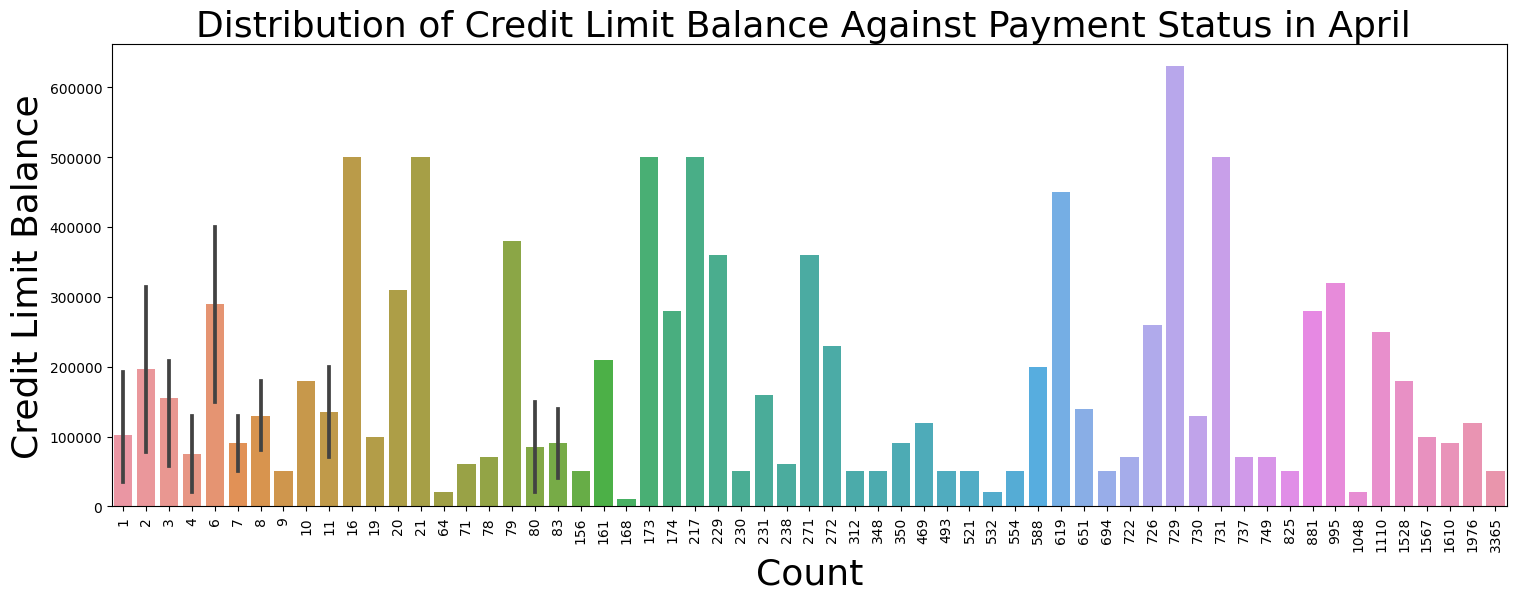

In [70]:
x = 'Pay_status_Apr'
y = data['Limit_bal']
plt.figure(figsize=(18,6))
sns.barplot(x=x, y=y,  data=limit_bal)
plt.xticks(rotation=90)
plt.xlabel('Count',fontsize=26)
plt.ylabel('Credit Limit Balance',fontsize=26)
plt.title('Distribution of Credit Limit Balance Against Payment Status in April ',fontsize=26)
plt.show()

The above process might be quite tedious therefore we will automate it to plot the other columns for us and switch to using a count plot that displays the frequency of each categorical feature. 

In [ ]:
# Function to plot bar charts showing Payment Status against Limit balance
# takes in data and the columns to be plotted
def plot_bar_charts(data, columns):
    for column in columns:
        x = column
        y = data['Limit_bal']
        title = f"Distribution of {column}"
        xlabel = column.replace('_', ' ').title()
        ylabel = "Count"
        
        plt.figure(figsize=(18,6))
        order = data[column]
        sns.countplot(x=column, order=order, data=data)
        plt.xticks(rotation=90)
        plt.xlabel(xlabel, fontsize=26)
        plt.ylabel(ylabel, fontsize=26)
        plt.title(title, fontsize=26)
        plt.show()

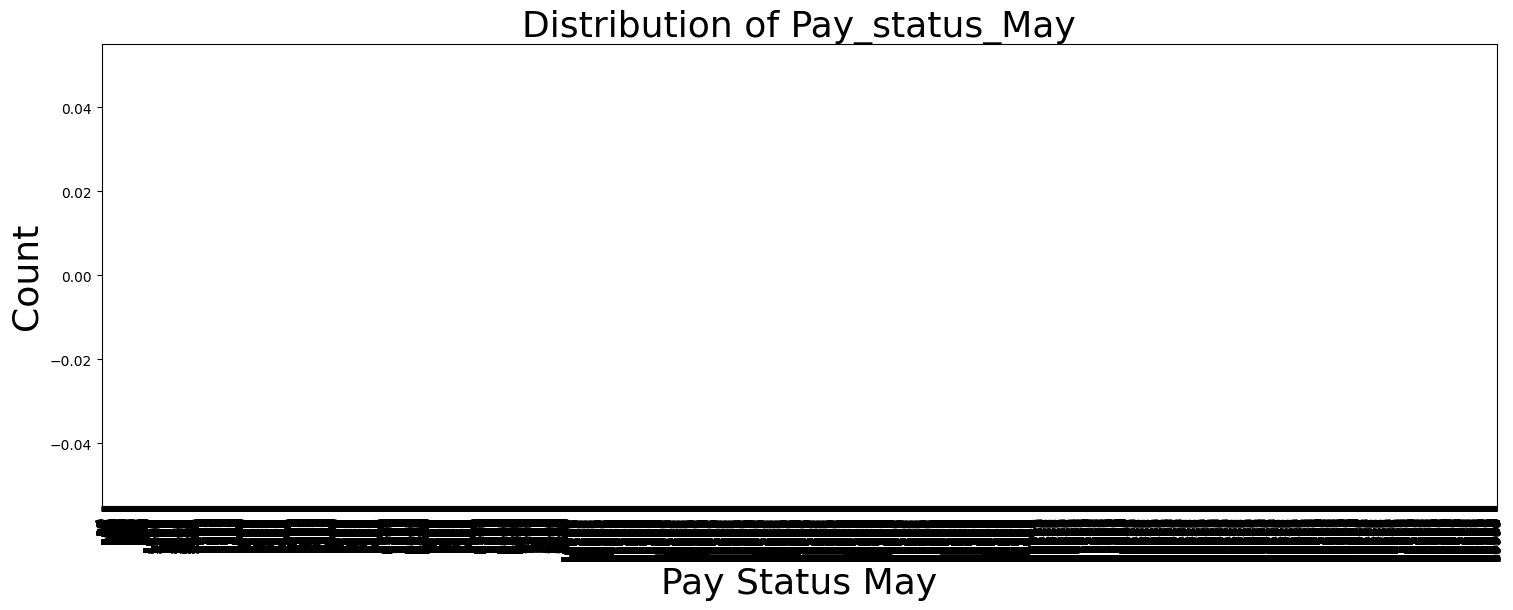

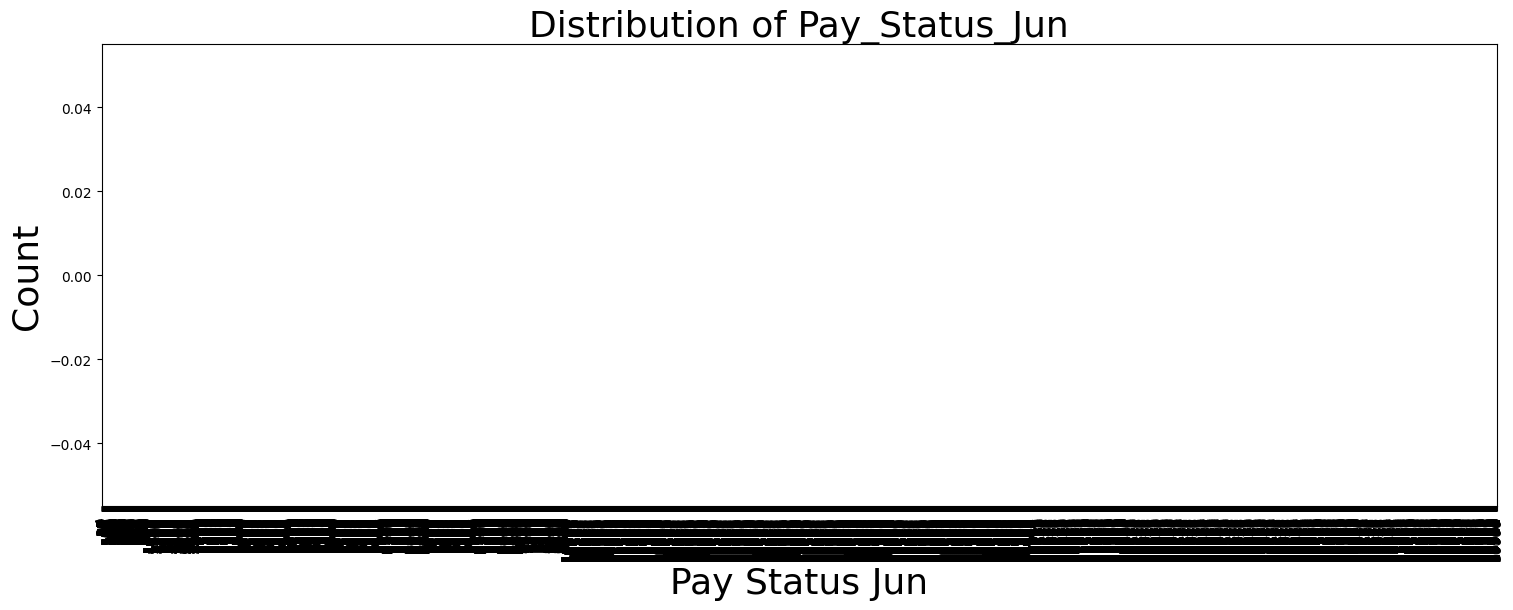

KeyboardInterrupt: 

In [81]:
columns_to_plot = ['Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul', 'Pay_Status_Aug',
                    'Pay_Status_Sept']
plot_bar_charts(data, columns_to_plot)

In [55]:
data.columns

Index(['Limit_bal', 'Sex', 'Education', 'Marriage', 'Age', 'Pay_status_Apr',
       'Pay_status_May', 'Pay_Status_Jun', 'Pay_Status_Jul', 'Pay_Status_Aug',
       'Pay_Status_Sept', 'Bill_amt_Apr', 'Bill_amt_May', 'Bill_amt_Jun',
       'Bill_amt_Jul', 'Bill_amt_Aug', 'Bill_amt_Sept', 'Paid_amt_Apr',
       'Paid_amt_May', 'Paid_amt_Jun', 'Paid_amt_Jul', 'Paid_amt_Aug',
       'Paid_amt_Sept', 'Default payment next month'],
      dtype='object', name='ID')

In [42]:
data.describe()

ID,Limit_bal,Age,Bill_amt_Apr,Bill_amt_May,Bill_amt_Jun,Bill_amt_Jul,Bill_amt_Aug,Bill_amt_Sept,Paid_amt_Apr,Paid_amt_May,Paid_amt_Jun,Paid_amt_Jul,Paid_amt_Aug,Paid_amt_Sept,Default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


We will now look at the values in our target column. Here the entry 0 refers to non default in the coming month, and 1 refers to default.

In [20]:
data['Default payment next month'].value_counts()

Default payment next month
0    23364
1     6636
Name: count, dtype: int64

we observe the data only has 6636 clients who default their payments. 